In [4]:
import cvxpy as cp
import numpy as np
import pandas as pd

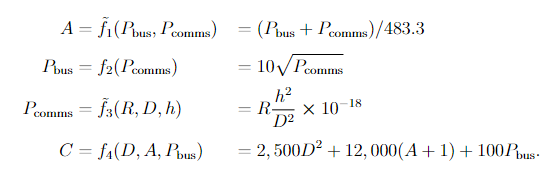

In [2]:
A = cp.Variable(pos=True)
Pb = cp.Variable(pos=True)
Pc = cp.Variable(pos=True)
D = cp.Variable(pos=True)
h = cp.Variable(pos=True)
C = cp.Variable(pos=True)
R = cp.Variable(pos=True)

objective_fn = 2500*D**2+12000*(A+1)+100*Pb
constraints = [
  A >= (Pb+Pc)/483.307, Pb**2 == 100*Pc, Pc==R*h**2/D**2*1e-18, h>=400e3, R>=8e6]
problem = cp.Problem(cp.Minimize(objective_fn), constraints)
problem.solve(gp=True)

15300.924351485446

# Check the solution is tight

In [3]:
((Pb+Pc)/483.307).value, A.value

(0.04080478132843842, 0.04080482220110736)

# Values

In [17]:
from compute import prettyprintval

In [26]:
variables = {'$$A$$':A, '$$D$$':D, '$$h$$':h, '$$P_{comms}$$':Pc, '$$P_{bus}$$':Pb, '$$C$$':problem.objective}
pd.DataFrame([(var_name, prettyprintval(var.value)) for var_name,var in variables.items()]).style.hide(axis="columns").hide(axis="index")